#Dataset
https://www.kaggle.com/muhammadhananasghar/sh2022-dataset
#Author:
Muhammad Hanan Asghar

In [26]:
!nvidia-smi

Fri Jan 14 08:17:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    29W /  70W |   9194MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muhammadhananasghar/sh2022-dataset

100% 1.69G/1.69G [00:14<00:00, 123MB/s]
100% 1.69G/1.69G [00:14<00:00, 123MB/s]


In [ ]:
!unzip *.zip && rm -rf *.zip

In [ ]:
TRAIN_DIR = "/content/dataset/train"
TEST_DIR = "/content/dataset/test"

IMG_WIDTH = 224
IMG_HEIGHT = 224
CHANNELS = 3
EPOCHS = 50
BATCH_SIZE = 32

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet',
              include_top=False,
              input_shape = (IMG_WIDTH, IMG_HEIGHT, CHANNELS))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
# view the structure of the model
model.summary()

In [ ]:
def layer_adder(bottom_model, numclasses):
  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024, activation='relu')(top_model)
  top_model = Dense(512, activation='relu')(top_model)
  top_model = Dense(numclasses, activation='softmax')(top_model)
  return top_model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


dataset_gen = ImageDataGenerator(rescale = 1./255, validation_split=0.25)

train_generator = dataset_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=64,
    class_mode='categorical',
    subset="training") 

validation_generator = dataset_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=64,
    class_mode='categorical',
    subset="validation")

Found 59883 images belonging to 24 classes.
Found 19952 images belonging to 24 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation, Dropout
from keras.layers import Conv2D, MaxPool2D, ZeroPadding2D, Input
from keras.models import Model


num_classes = train_generator.num_classes

FC_Head = layer_adder(model, num_classes)
model = Model(inputs = model.input, outputs = FC_Head)

print(model.summary())

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint("model.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose = 1)

earlystop = EarlyStopping(monitor="val_loss",
                         min_delta=0,
                         patience=3,
                         verbose=1,
                         restore_best_weights=True)

callbacks = [earlystop, checkpoint]

model.compile(loss="categorical_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                              epochs = 10,
                              callbacks=callbacks,
                              validation_data=validation_generator)

Epoch 1/10
936/936 [==============================] - ETA: 0s - loss: 1.4368 - accuracy: 0.5811
Epoch 00001: val_loss improved from inf to 0.81185, saving model to model.h5
936/936 [==============================] - 361s 366ms/step - loss: 1.4368 - accuracy: 0.5811 - val_loss: 0.8119 - val_accuracy: 0.7604
Epoch 2/10
936/936 [==============================] - ETA: 0s - loss: 0.6684 - accuracy: 0.8030
Epoch 00002: val_loss improved from 0.81185 to 0.54763, saving model to model.h5
936/936 [==============================] - 329s 351ms/step - loss: 0.6684 - accuracy: 0.8030 - val_loss: 0.5476 - val_accuracy: 0.8357
Epoch 3/10
936/936 [==============================] - ETA: 0s - loss: 0.4510 - accuracy: 0.8659
Epoch 00003: val_loss improved from 0.54763 to 0.41433, saving model to model.h5
936/936 [==============================] - 329s 352ms/step - loss: 0.4510 - accuracy: 0.8659 - val_loss: 0.4143 - val_accuracy: 0.8756
Epoch 4/10
936/936 [==============================] - ETA: 0s - loss

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!cp '/content/model.h5' '/content/drive/MyDrive/Models(AI)'

In [ ]:
import matplotlib.pyplot as plt

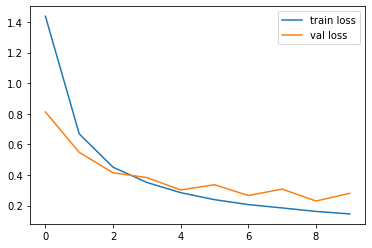

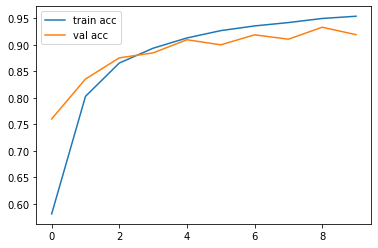

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
predictions_values = train_generator.class_indices

In [ ]:
predictions = {}
for i,j in predictions_values.items():
  predictions[int(j)] = i

In [27]:
predictions

{0: 'Ant Man',
 1: 'Aquaman',
 2: 'Batman',
 3: 'Black Panther',
 4: 'Black Widow',
 5: 'Captain America',
 6: 'Captain Marvel',
 7: 'Deadpool',
 8: 'Dr Strange',
 9: 'Falcon',
 10: 'Flash',
 11: 'Green Lantern',
 12: 'Hawkeye',
 13: 'Hulk',
 14: 'Iron Man',
 15: 'Joker',
 16: 'Nebula',
 17: 'Rocket Raccon',
 18: 'Scarlet Witch',
 19: 'Shazam',
 20: 'Spider Man',
 21: 'Super Man',
 22: 'Thor',
 23: 'Wonder Woman'}

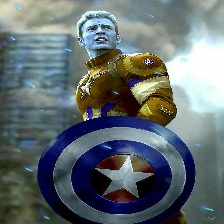

Captain America


In [22]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/cap.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

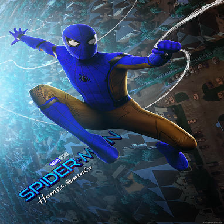

Spider Man


In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/spi.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

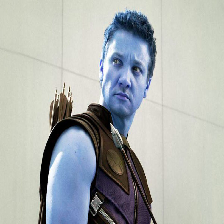

Hawkeye


In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/hawk3.jpeg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

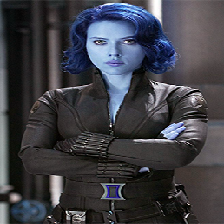

Black Widow


In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/black.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

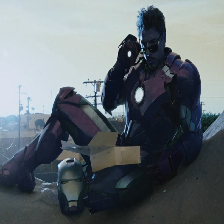

Iron Man


In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/iron.jpeg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

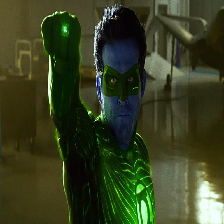

Green Lantern


In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/green.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

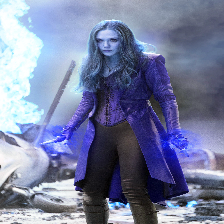

Wonder Woman


In [24]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/sw2.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

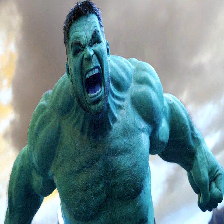

Hulk


In [23]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/hulk.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

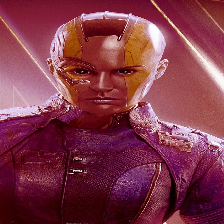

Nebula


In [25]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/neb.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

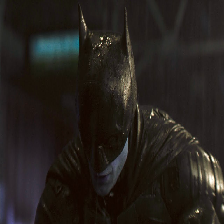

Black Panther


In [28]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/bat.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

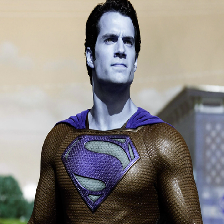

Super Man


In [29]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/super.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

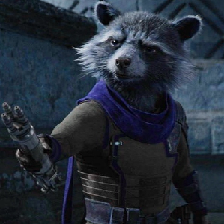

Rocket Raccon


In [30]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/rr.jpeg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

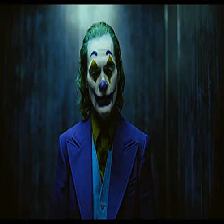

Joker


In [31]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/joker.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

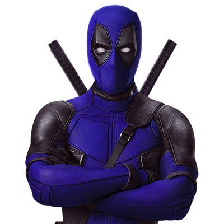

Deadpool


In [32]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/dead.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

test_image = image.load_img("/content/bat.jpg", target_size=(224,224))
test_image = image.img_to_array(test_image)
cv2_imshow(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(predictions[np.argmax(result)])